# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
import json
from operator import itemgetter

In [3]:
# load dataset
twitter_archived_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archived_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# download 2nd dataset programmatically
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as f:
    f.write(response.content)

In [5]:
# load 2nd dataset
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archived_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

### The above code failed

In [10]:
# The token has expired, I decided to load data programmatically
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

with open('tweet-json.txt', mode='wb') as f:
    f.write(response.content)

In [11]:
#coverting txt file to json
data = 'tweet-json.txt'

with open(data, 'r') as f:
    jdata = [json.loads(line) for line in f]     

In [12]:
# extracting the required columns
data = list(map(itemgetter('id','retweet_count','favorite_count'), jdata))
data[0:4]

[(892420643555336193, 8853, 39467),
 (892177421306343426, 6514, 33819),
 (891815181378084864, 4328, 25461),
 (891689557279858688, 8964, 42908)]

In [13]:
# load into pandas dataframe and add column names
df = pd.DataFrame(data, columns=['tweet_id','retweet_count','favorite_count'])
df.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [14]:
# save 3rd dataset in CSV format
df.to_csv('tweet_json.csv', index=False)

## Assessing Data

In [15]:
# load the datasets
twitter_archived_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
tweet_fav_counts = pd.read_csv('tweet_json.csv')

### The Tweeter Archived Enhanced Data

In [16]:
# checking the column names
twitter_archived_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [17]:
# checking the number of rows and columns
twitter_archived_enhanced.shape

(2356, 17)

In [18]:
# checking if any tweet ID is duplicated
twitter_archived_enhanced.tweet_id.duplicated().any()

False

In [19]:
# checking for missing data in all columns
twitter_archived_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [20]:
# visualizing 5 random data
twitter_archived_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,None,None,None,None
2123,670385711116361728,NaN,NaN,2015-11-27 23:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670385711...,8,10,Larry,None,None,None,None
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None
400,824775126675836928,NaN,NaN,2017-01-27 00:24:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,None,None,None,None


In [21]:
# general information about the dataset
twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
# checking the actual numbers of puppo
twitter_archived_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
# checking the actual numbers of pupper
twitter_archived_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [24]:
# checking the actual numbers of floofer
twitter_archived_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [25]:
# checking the actual numbers of doggo
twitter_archived_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
# checking for the numbers of dogs that had their stage of development mentioned in the text column
twitter_archived_enhanced.text.str.extract(r"(doggo|Doggo|floofer|Floofer|pupper|puppo|Puppo|Pupper)").notnull().sum()

0    418
dtype: int64

In [27]:
# Inspecting the name column
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
twitter_archived_enhanced.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Tucker             10
Lola               10
Bo                  9
Winston             9
Sadie               8
the                 8
Toby                7
an                  7
Buddy               7
Daisy               7
Bailey              7
Leo                 6
Scout               6
Oscar               6
Bella               6
Stanley             6
Koda                6
Jax                 6
Dave                6
Rusty               6
Milo                6
Jack                6
Sammy               5
Phil                5
Chester             5
George              5
Finn                5
Louis               5
Alfie               5
very                5
Oakley              5
Bentley             5
Sunny               5
Larry               5
Gus                 5
Ruby                4
Boomer              4
Jerry               4
Gerald    

In [28]:
# All inappropriate names starting with small letters
index = np.where(twitter_archived_enhanced.name.str.islower())
for i in index:
    print(twitter_archived_enhanced.iloc[i,12].unique())

['such' 'a' 'quite' 'not' 'one' 'incredibly' 'mad' 'an' 'very' 'just' 'my'
 'his' 'actually' 'getting' 'this' 'unacceptable' 'all' 'old' 'infuriating'
 'the' 'by' 'officially' 'life' 'light' 'space']


In [29]:
# inspecting the rating_numerator
twitter_archived_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [30]:
# further rating_numerator inspection
twitter_archived_enhanced.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [31]:
# inspecting the rating_denominator column
twitter_archived_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [32]:
# inspecting the data where rating_denominator is not 10
pd.set_option('display.max_colwidth',1)
twitter_archived_enhanced[twitter_archived_enhanced['rating_denominator'] != 10][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [33]:
# inspecting tweets without status photo
twitter_archived_enhanced['expanded_urls'].isnull().sum()

59

In [34]:
# inspecting the source of tweets
twitter_archived_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

### The Image Prediction Data

In [35]:
# the columns
img_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [36]:
# dimension of the dataset
img_predictions.shape

(2075, 12)

In [37]:
# 3 random data in the dataset
img_predictions.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
784,690021994562220032,https://pbs.twimg.com/media/CZNzV6cW0AAsX7p.jpg,1,badger,0.289550,False,weasel,0.099140,False,malamute,0.040696,True
743,687476254459715584,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,1,wood_rabbit,0.702725,False,Angora,0.190659,False,hare,0.105072,False
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False


In [38]:
# general information about the dataset
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
# checking for duplicate ID
img_predictions.tweet_id.duplicated().any()

False

### The Tweets and Favorite count columns

In [40]:
# checking the columns
tweet_fav_counts.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [41]:
# checking the dimension
tweet_fav_counts.shape

(2354, 3)

In [42]:
# checking the last 5 data
tweet_fav_counts.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [43]:
# checking for duplicated id
tweet_fav_counts.tweet_id.duplicated().any()

False

In [44]:
# general information 
tweet_fav_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [45]:
# aggregates of the dataset
tweet_fav_counts.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues

#### Tweeter_archive_enhanced
1. There are 181 retweets and 78 replies to tweets, these are not original tweets.
2. The day and time should be extracted from the timestamp column
3. day datatype
4. The tweet_id and thhe in_reply_to_status_id datatype
5. Rating Problems: Some of the ratings in the the rating_numerator columns are inappropriate. some are meant to be decimal, while others are  not rated over 10.
6. Ratings should be float
7. Name problems
8. Delete all columns not necessary for investigation
9. None nstead of missing values in the dog stage columns

#### Image_prediction
7. The p1, p2 and p3 should be categorical data

8. The tweet_id is int instead of string

#### Tweet_Favorite_counts
9. The tweet_id is int instead of string

### Tidiness issues
1. The four sources of tweets should be extracted from the url in the source column
2. Merge the dog_stage columns into one
3. All datasets should be merged

## Cleaning Data

In [71]:
# Make copies of original pieces of data
twitter_archived_clean = twitter_archived_enhanced.copy()
img_predictions_clean = img_predictions.copy()
tweet_fav_clean = tweet_fav_counts.copy()

## Tidiness Issues

### Issue #1: Dog stages in multiple columns

#### Define:
Merge the doggo, floofer, pupper and puppo into a single column named dog_stages

#### Code

In [72]:
# Firstly, convert None to empty values
twitter_archived_clean.doggo.replace('None', '', inplace=True)
twitter_archived_clean.floofer.replace('None', '', inplace=True)
twitter_archived_clean.pupper.replace('None', '', inplace=True)
twitter_archived_clean.puppo.replace('None', '', inplace=True)

# merge columns into dog_stages
twitter_archived_clean['dog_stages'] = twitter_archived_clean.doggo + twitter_archived_clean.floofer + twitter_archived_clean.pupper + twitter_archived_clean.puppo
twitter_archived_clean['dog_stages'].value_counts()

                1976
pupper          245 
doggo           83  
puppo           29  
doggopupper     12  
floofer         9   
doggofloofer    1   
doggopuppo      1   
Name: dog_stages, dtype: int64

In [73]:
# convert those with more than one values to Multiple Stages
twitter_archived_clean.dog_stages.replace(['doggopupper','doggopuppo','doggofloofer'], ['multiple','multiple','multiple'], inplace=True)

# replace missing values with NaN
twitter_archived_clean.dog_stages.replace('',np.nan, inplace=True)

#### Test 

In [74]:
twitter_archived_clean.dog_stages.value_counts()

pupper      245
doggo       83 
puppo       29 
multiple    14 
floofer     9  
Name: dog_stages, dtype: int64

### Issue 2 # : The source has the HTML link

#### Define:
Extract the source of the tweet from the source column

#### Code

In [75]:
# checking out the number of each value in the variable, before extraction 
twitter_archived_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [76]:
# Extracting the source from the link
twitter_archived_clean['source'] = twitter_archived_clean.source.str.extract(r"(iphone|Vine|Web|TweetDeck)")

#### Test

In [77]:
# checking if sources were extracted and the value count still remains the same
twitter_archived_clean['source'].value_counts()

iphone       2221
Vine         91  
Web          33  
TweetDeck    11  
Name: source, dtype: int64

## Quality Issues

### Issue #1: None original tweets

#### Define: 
Remove all none original rows, which include the retweet and the reply data

#### Code

In [78]:
# Using the query method to grab only original tweets
twitter_archived_clean = twitter_archived_clean.query('retweeted_status_id == "NAN"')

#### Test

In [79]:
# Checking if there is any data that is a retweet of an original tweet
twitter_archived_clean.retweeted_status_id.notnull().sum()

0

### Issue  #2 and 3:  Day and time together, and day datatype

#### Define: split the day and time from the timestamp. convert day datatype to datetime

#### Code

In [81]:
# get the day and time of tweets
timestamp = twitter_archived_clean['timestamp'].str.split(" ", expand=True)
twitter_archived_clean[['day','time']] = timestamp.iloc[:,0:2]

# change datatype to datetime
twitter_archived_clean['day'] = pd.to_datetime(twitter_archived_clean.day)

#### Test

In [326]:
# checking
twitter_archived_clean[['day','time']].head()

,day,time
0,2017-08-01,16:23:56
1,2017-08-01,00:17:27
2,2017-07-31,00:18:03
3,2017-07-30,15:58:51
4,2017-07-29,16:00:24


In [82]:
# checking
twitter_archived_clean['day'].dtypes 

dtype('<M8[ns]')

### 4. The tweet_id,  'in_reply_to_user_id'and the in_reply_to_status_id datatype

#### Define: Change the data type from int to string

#### Code

In [95]:
# change data type for all 3 tweet_ids
twitter_archived_clean['tweet_id'] = twitter_archived_clean['tweet_id'].astype('str')
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype('str')
tweet_fav_clean['tweet_id'] = tweet_fav_clean['tweet_id'].astype('str')

# change data type for in_reply_to_status_id
twitter_archived_clean['in_reply_to_status_id'] = twitter_archived_clean['in_reply_to_status_id'].astype('str')
twitter_archived_clean['in_reply_to_user_id'] = twitter_archived_clean['in_reply_to_user_id'].astype('str')

#### Test

In [96]:
#checking if data type has been changed
twitter_archived_clean[['tweet_id', 'in_reply_to_status_id','in_reply_to_user_id']].dtypes

tweet_id                 object
in_reply_to_status_id    object
in_reply_to_user_id      object
dtype: object

### Issue # 4: The ratings are not approriate

#### Define:
Extract the ratings from the text column, making sure all are rated over 10 and those with decimal points are represented. Check those with null values and act on them (either drop or fill with mean value)

#### Code

In [85]:
# Extracting the ratings into a new_rating, all rated over 10 including those with decimal points
twitter_archived_clean['new_rating'] = twitter_archived_clean.text.str.extract(r"(\d+\.\d+\/10|\d+\/10)")

# spliting the new_ratings into the numerator and denominators
new_rating = twitter_archived_clean['new_rating'].str.split('/', expand=True)

# saving the the numerator into the twitter_archive_enhaced DataFrame as rating
twitter_archived_clean['rating_numerator'] = new_rating[0]

In [86]:
# Inspect the data without rating visually
pd.set_option('display.max_colwidth',1) #show everything in all columns
i = np.where(twitter_archived_clean['new_rating'].isnull()) #Get the list of the index of those without ratings 
twitter_archived_clean.iloc[i] # display all rows that has no rating

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages,day,time,new_rating
342,832088576586297345,8.3208754756e+17,3.058208e+07,2017-02-16 04:45:50 +0000,iphone,@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,NaN,15,None,,,,,NaN,2017-02-16,04:45:50,NaN
433,820690176645140481,nan,NaN,2017-01-15 17:52:40 +0000,iphone,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",NaN,70,None,,,,,NaN,2017-01-15,17:52:40,NaN
516,810984652412424192,nan,NaN,2016-12-19 23:06:23 +0000,iphone,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,7,Sam,,,,,NaN,2016-12-19,23:06:23,NaN
902,758467244762497024,nan,NaN,2016-07-28 01:00:57 +0000,iphone,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,NaN,150,None,,,,,NaN,2016-07-28,01:00:57,NaN
1120,731156023742988288,nan,NaN,2016-05-13 16:15:54 +0000,iphone,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,NaN,170,this,,,,,NaN,2016-05-13,16:15:54,NaN
1228,713900603437621249,nan,NaN,2016-03-27 01:29:02 +0000,iphone,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,NaN,90,None,,,,,NaN,2016-03-27,01:29:02,NaN
1254,710658690886586372,nan,NaN,2016-03-18 02:46:49 +0000,iphone,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,NaN,80,None,,,,,NaN,2016-03-18,02:46:49,NaN
1274,709198395643068416,nan,NaN,2016-03-14 02:04:08 +0000,iphone,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,NaN,50,None,,,,,NaN,2016-03-14,02:04:08,NaN
1351,704054845121142784,nan,NaN,2016-02-28 21:25:30 +0000,iphone,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,NaN,50,a,,,,,NaN,2016-02-28,21:25:30,NaN
1433,697463031882764288,nan,NaN,2016-02-10 16:51:59 +0000,iphone,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031882764288/photo/1,NaN,40,None,,,,,NaN,2016-02-10,16:51:59,NaN


In [87]:
# It was observed that the tweets without ratings are generally not about a specific dog
# therefore are not needed for these investigation, delete them.

twitter_archived_clean = twitter_archived_clean.drop(twitter_archived_clean.index[i])

#### Test

In [88]:
#checking the denominator, making sure it's only 10
new_rating[1].value_counts()

10    2159
Name: 1, dtype: int64

In [89]:
# checking for ratings with decimals
twitter_archived_clean['rating_numerator'].value_counts()

12       500
10       443
11       426
13       309
9        156
8        98 
7        52 
14       44 
5        34 
6        32 
3        19 
4        15 
2        9  
1        7  
0        2  
420      2  
1776     1  
182      1  
9.5      1  
666      1  
17       1  
11.26    1  
9.75     1  
007      1  
11.27    1  
13.5     1  
15       1  
Name: rating_numerator, dtype: int64

In [90]:
# checking for observation without ratings  
twitter_archived_clean['rating_numerator'].isnull().sum()

0

### Issue  #5 and 6: rating_numerator column name and datatype

#### Define: 
Change the column named rating_numerator to rating and datatype to float

#### Code

In [91]:
# change column name
twitter_archived_clean = twitter_archived_clean.rename(columns={'rating_numerator':'rating'})

# change the data type
twitter_archived_clean['rating'] = twitter_archived_clean['rating'].astype('float')

#### Test

In [92]:
# checking
twitter_archived_clean.rating.dtype

dtype('float64')

### Issue  #6: Dog name problems

#### Define:
names like 'the', 'a', 'not', 'just', 'this', 'old', 'very', 'all', 'by, 'his', 'life', 'my' etcetera, are not appropriate and all starts with small letter. They should be chaned to None. Then change all None to 'No Name'


#### Code

In [93]:
# the index of all dogs with the wrong names
index = np.where(twitter_archived_clean.name.str.islower())

# the list of all the dogs with the wrong names
for i in index:
    wrong_names = twitter_archived_clean.iloc[i,4].tolist()

# # replacing wrong names with None
for names in twitter_archived_clean['name']:
    if names in wrong_names:
        twitter_archived_clean['name']=twitter_archived_clean['name'].replace(names,'None') 
# replace None with No_name
twitter_archived_clean['name']=twitter_archived_clean['name'].replace('None','No Name') 

#### Test

In [94]:
# checking erong names
twitter_archived_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'No Name', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', '

### Issue #6: Delete all columns not necessary for investigation

#### Define:
Delete the following columns;  'retweeted_status_user_id,'retweeted_status_timestamp', 'text', 'rating_denominator, 'expanded_urls', 'doggo', 'floofer', 'pupper','puppo','new_rating' because the are not necessary for this analysis.

#### Code

In [97]:
# using the drop function to delete the columns that are no longer required
twitter_archived_clean = twitter_archived_clean.drop(['timestamp',
                                                      'retweeted_status_id',
                                                      'retweeted_status_user_id',
                                                      'retweeted_status_timestamp',                                                      
                                                      'text',                                                      
                                                      'rating_denominator',
                                                      'expanded_urls',
                                                      'doggo',
                                                      'floofer',
                                                      'pupper',
                                                      'puppo',
                                                      'new_rating'], axis=1)

#### Test

In [98]:
# Checking if columns were deleted 
twitter_archived_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'rating', 'name', 'dog_stages', 'day', 'time'],
      dtype='object')

### Issue  #8:   p1, p2, p3 data type

#### Define: 
Change the data type from string to categorical

#### Code

In [99]:
# change data type
img_predictions_clean[['p1','p2','p3']] = img_predictions_clean[['p1','p2','p3']].astype('category')

#### Test

In [100]:
#checking if data type has been changed
img_predictions_clean.dtypes

tweet_id    object  
jpg_url     object  
img_num     int64   
p1          category
p1_conf     float64 
p1_dog      bool    
p2          category
p2_conf     float64 
p2_dog      bool    
p3          category
p3_conf     float64 
p3_dog      bool    
dtype: object

## Merge all tables

#### Define: 
Merge the three tables into a single DataFrame named df_master

#### Code

In [101]:
# merging the 3 datasets into 1
df_master = twitter_archived_clean.merge(img_predictions_clean, on='tweet_id')
df_master = df_master.merge(tweet_fav_clean, on='tweet_id')

#### Test

In [102]:
# checkeng the master dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 0 to 1980
Data columns (total 22 columns):
tweet_id                 1981 non-null object
in_reply_to_status_id    1981 non-null object
in_reply_to_user_id      1981 non-null object
source                   1981 non-null object
rating                   1981 non-null float64
name                     1981 non-null object
dog_stages               306 non-null object
day                      1981 non-null datetime64[ns]
time                     1981 non-null object
jpg_url                  1981 non-null object
img_num                  1981 non-null int64
p1                       1981 non-null category
p1_conf                  1981 non-null float64
p1_dog                   1981 non-null bool
p2                       1981 non-null category
p2_conf                  1981 non-null float64
p2_dog                   1981 non-null bool
p3                       1981 non-null category
p3_conf                  1981 non-null float64
p3_dog 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [103]:
# save master dataframe to csv
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Determine the aggregate of the ratings, retweet, and favorite counts
2. Name of the dog with the highest rating and the day  and time of the tweet
3. Name of the dog with the highest retweets and the day  and time of the tweet
4. Name of the dog with the highest likes and the day  and time of the tweet
5. Percentages contribution of the different tweet sources 
6. Number of tweets per day
7. Percentages contribution of the different numbers of image posted

### 1. Determine the aggregate of the ratings, retweet, and favorite counts

In [105]:
# Determine the aggregate of the ratings, retweet, and favorite counts
df_master[['rating','retweet_count','favorite_count']].describe().round(1)

,rating,retweet_count,favorite_count
count,1981.0,1981.0,1981.0
mean,11.7,2775.6,8925.8
std,40.8,4688.2,12245.3
min,0.0,16.0,81.0
25%,10.0,622.0,1957.0
50%,11.0,1359.0,4144.0
75%,12.0,3225.0,11363.0
max,1776.0,79515.0,132810.0


In [106]:
df_master['rating'].mode()

0    12.0
dtype: float64

### 2. Name of the dog with the highest rating and the day  and time of the tweet

In [107]:
# Details of most rated dog
most_rated = df_master[df_master['rating'] == df_master['rating'].max()]

# Name of the dog with the highest ratings, and the day and time of the tweet
most_rated[['name','day','time']]

,name,day,time
723,Atticus,2016-07-04,15:00:45


### 3. Name of the dog with the highest retweets and the day  and time of the tweet

In [108]:
#details of dog with most retweet
most_rt = df_master[df_master['retweet_count'] == df_master['retweet_count'].max()]

# Name of the dog with the highest retweets, and the day and time of the tweet
most_rt[['name','day','time']]

,name,day,time
772,No Name,2016-06-18,18:26:18


### 4. Name of the dog with the highest likes and the day  and time of the tweet

In [109]:
#details of most liked dog
most_liked = df_master[df_master['favorite_count'] == df_master['favorite_count'].max()]

# Name of the dog with the highest likes, and the day and time of the tweet
most_liked[['name','day','time']]

,name,day,time
309,No Name,2017-01-21,18:26:02


### 5. Percentages contribution of the different tweet sources

In [110]:
# Percentages contribution of the different tweet sources 
per_source = df_master['source'].value_counts()/df_master['source'].count()*100
per_source.round(1)

iphone       98.0
Web          1.4 
TweetDeck    0.6 
Name: source, dtype: float64

### 6. Number of tweets per day

In [111]:
#Number of tweets per day
pd.set_option('display.max_rows', None)
df_master['day'].value_counts()

2015-11-28    26
2015-11-29    26
2015-11-16    25
2015-12-01    23
2015-11-19    23
2015-11-25    21
2015-11-20    20
2015-11-23    20
2015-12-07    20
2015-11-22    20
2015-12-08    19
2015-12-03    18
2015-12-10    17
2015-11-27    17
2015-11-30    17
2015-11-21    17
2015-11-18    17
2015-11-24    17
2015-12-11    16
2015-12-06    16
2015-12-12    16
2015-12-09    16
2015-11-17    15
2015-12-02    14
2015-12-04    14
2015-12-24    13
2015-12-05    13
2015-12-15    13
2015-11-26    12
2015-12-21    11
2015-12-14    10
2015-12-17    10
2015-12-13    10
2016-07-04    10
2015-12-16    10
2016-10-31    10
2015-12-23    10
2015-12-27    9 
2015-12-20    9 
2015-12-18    8 
2016-12-25    8 
2015-12-28    8 
2015-12-25    8 
2015-12-30    7 
2016-01-05    7 
2016-01-08    7 
2016-01-13    7 
2016-01-07    7 
2015-12-31    7 
2016-01-04    7 
2016-02-17    7 
2016-01-29    7 
2016-01-20    7 
2016-03-06    6 
2016-01-11    6 
2016-01-03    6 
2016-01-09    6 
2016-03-02    6 
2016-01-23    

### 7. Percentages contribution of the different numbers of image posted

In [112]:
# Percentages contribution of the different numbers of image posted
per_img_num = df_master['img_num'].value_counts()/df_master['img_num'].count()*100
per_img_num.round(1)

1    85.8
2    9.5 
3    3.1 
4    1.5 
Name: img_num, dtype: float64

### Visualization
1. Boxplot for the ratings
2. Plot the boxplot again after eliminating outliers
3. Relationship between retweet counts and ratings
4. Relationship between favorite counts and ratings
5. Relationship between favorite counts and retweet counts
6. Relationship between number of image posted and retweets
7. Bar chart of number of images posted 
8. Bar chart of sources of tweets
9. Bar chart of dog stages

### 1. Boxplot for the ratings

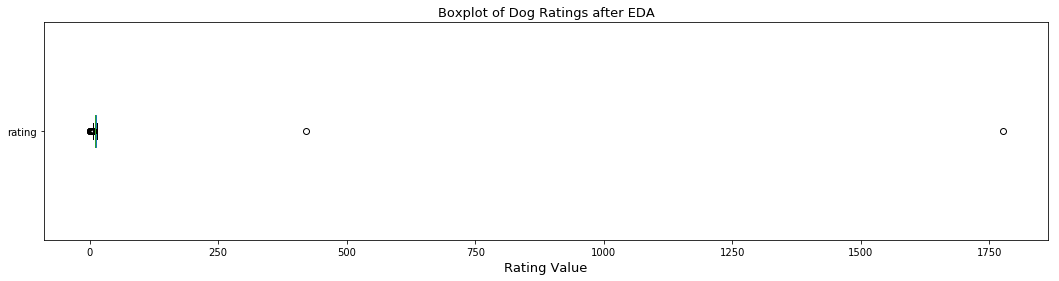

In [140]:
# Boxplot for the ratings
df_master[['rating']].plot(kind='box',vert=False, figsize=(18,4));

# chart labels
plt.title('Boxplot of Dog Ratings', fontsize=13);
plt.title('Boxplot of Dog Ratings after EDA', fontsize=13);
plt.xlabel('Rating Value', fontsize=13);

### 2. Plot the boxplot again after eliminating outliers

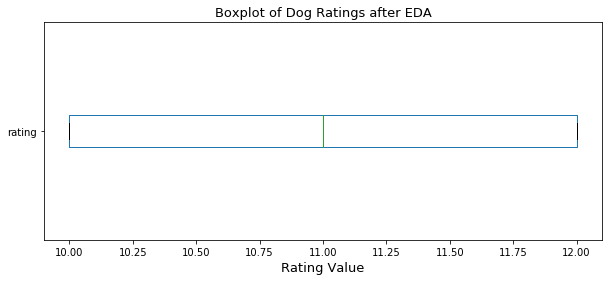

In [141]:
#Eliminate outlier using the 25th and 75th percentiles
df_master_EDA = df_master.query('rating >= 10 & rating <= 12')

#boxPlot chart for the modified data
df_master_EDA['rating'].plot(kind='box',vert=False, figsize=(10,4));

# chart labels
plt.title('Boxplot of Dog Ratings after EDA', fontsize=13);
plt.xlabel('Rating Value', fontsize=13);

### 3. Relationship between retweet counts and ratings

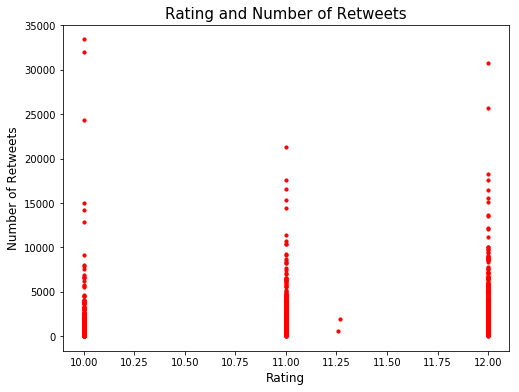

In [188]:
# Relationship between retweet counts and ratings
df_master_EDA.plot.scatter(x='rating',y='retweet_count',s=10,c='red', figsize=(8,6));

#chart labels
plt.xlabel('Rating', fontsize=12);
plt.ylabel('Number of Retweets', fontsize=12)
plt.title('Rating and Number of Retweets', fontsize=15);

### 4. Relationship between favorite counts and ratings

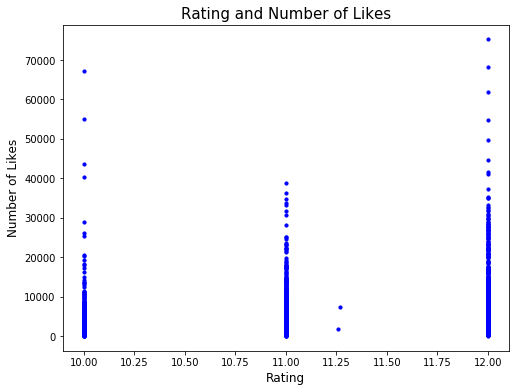

In [187]:
# Relationship between favorite counts and ratings
df_master_EDA.plot.scatter(x='rating',y='favorite_count',s=10,c='blue',figsize=(8,6));

# chart labels
plt.xlabel('Rating', fontsize=12);
plt.ylabel('Number of Likes', fontsize=12)
plt.title('Rating and Number of Likes', fontsize=15);

### 5. Relationship between favorite counts and retweet counts

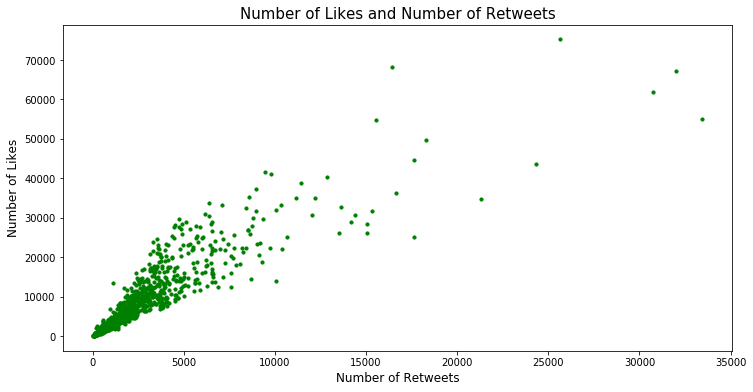

In [182]:
#Relationship between favorite counts and retweet counts
df_master_EDA.plot.scatter(x='retweet_count',y='favorite_count',s=10,c='green',figsize=(12,6));

# chart labels
plt.xlabel('Number of Retweets', fontsize=12);
plt.ylabel('Number of Likes', fontsize=12)
plt.title('Number of Likes and Number of Retweets', fontsize=15);

### 6. Relationship between number of image posted and retweets

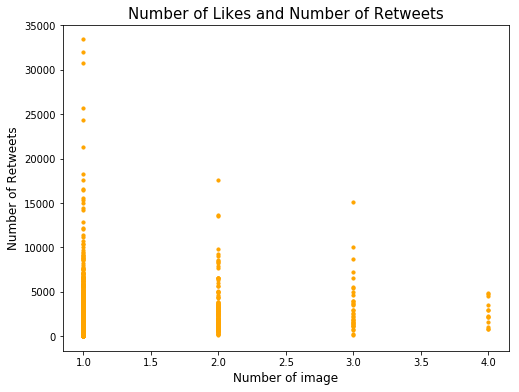

In [360]:
# Relationship between image number and retweets
df_master_EDA.plot.scatter(x='img_num',y='retweet_count',s=10,c='orange', figsize=(8,6));

# chart labels
plt.xlabel('Number of image', fontsize=12);
plt.ylabel('Number of Retweets', fontsize=12)
plt.title('Number of Likes and Number of Retweets', fontsize=15);

### 7. Bar chart of number of images posted 

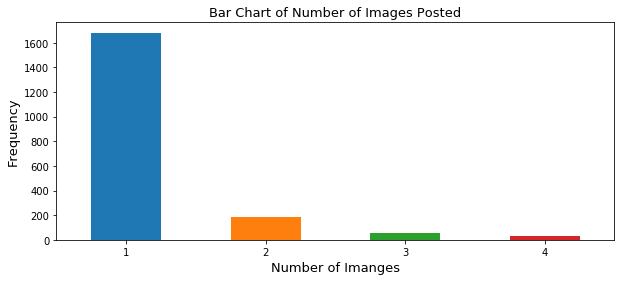

In [205]:
#Bar Chart of Number of Images Posted
df_master['img_num'].value_counts().plot(kind='bar', figsize=(10,4));

# chart labels
plt.title('Bar Chart of Number of Images Posted', fontsize=13)
plt.xlabel('Number of Imanges',fontsize=13)
plt.ylabel('Frequency', fontsize=13);
plt.xticks(rotation=0);

### 8. Bar chart of sources of tweets

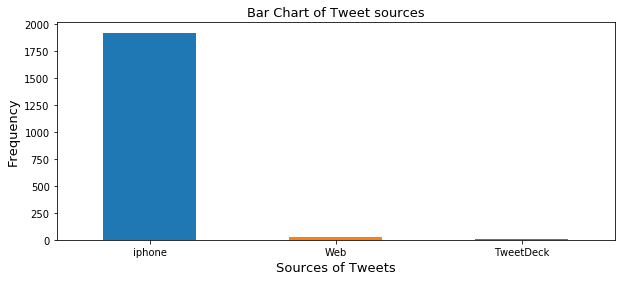

In [203]:
#Bar chart of sources of tweets
df_master['source'].value_counts().plot(kind='bar', figsize=(10,4));

# chart labels
plt.title('Bar Chart of Tweet sources', fontsize=13);
plt.xlabel('Sources of Tweets',fontsize=13)
plt.ylabel('Frequency', fontsize=13);
plt.xticks(rotation=0);

### 9. Bar chart of dog stages

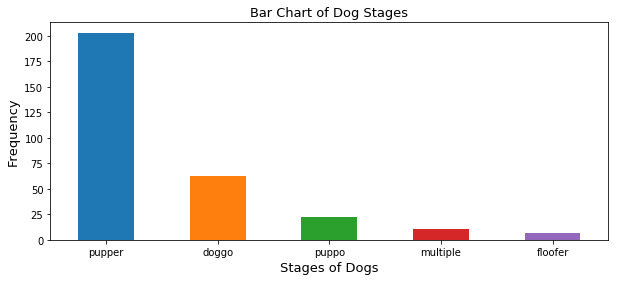

In [104]:
#Bar chart of sources of tweets
df_master['dog_stages'].value_counts().plot(kind='bar', figsize=(10,4));

# chart labels
plt.title('Bar Chart of Dog Stages', fontsize=13);
plt.xlabel('Stages of Dogs',fontsize=13)
plt.ylabel('Frequency', fontsize=13);
plt.xticks(rotation=0);